In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import files
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

In [2]:
#read data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/product_demand.csv")
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091.0,99.0375,111.8625,20.0
1,2,8091.0,99.0375,99.0375,28.0
2,3,8091.0,133.9500,133.9500,19.0
3,4,8091.0,133.9500,133.9500,44.0
4,5,8091.0,141.0750,141.0750,52.0


In [ ]:
# prompt: check if df has any nan value

print(df.isnull().sum())
# print(df.isna().sum())
df.fillna(0, inplace=True)
#can also use dropna
df.dropna(inplace=True)
print(df.isnull().sum())

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64
ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64
ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64


In [ ]:
# prompt: show scatterplot of plotly.express from df where x axis will be 'Units Sold' and y axis will be 'Total Price' and size will be 'Units Sold'

fig = px.scatter(df, x='Units Sold', y='Total Price', size='Units Sold')
fig.show()

In [ ]:
# prompt: print correlation of df

print(df.corr())
# a=df.corr(method='pearson')     #default
# b=df.corr(method='spearman')
# c=df.corr(method='kendall')
# print(a)
# print(b)
# print(c)
x=df.corr()
x["Units Sold"].sort_values(ascending=False)

                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.007733     0.016212    0.019079   -0.006698
Store ID     0.007733  1.000000    -0.038421   -0.038937    0.004490
Total Price  0.016212 -0.038421     1.000000    0.965192   -0.249252
Base Price   0.019079 -0.038937     0.965192    1.000000   -0.153777
Units Sold  -0.006698  0.004490    -0.249252   -0.153777    1.000000
                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.007733     0.016212    0.019079   -0.006698
Store ID     0.007733  1.000000    -0.038421   -0.038937    0.004490
Total Price  0.016212 -0.038421     1.000000    0.965192   -0.249252
Base Price   0.019079 -0.038937     0.965192    1.000000   -0.153777
Units Sold  -0.006698  0.004490    -0.249252   -0.153777    1.000000
                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.006903     0.019847    0.013123    0.022236
Store ID     0.006903  1.000000   

,Units Sold
Units Sold,1.000000
Store ID,0.004490
ID,-0.006698
Base Price,-0.153777
Total Price,-0.249252


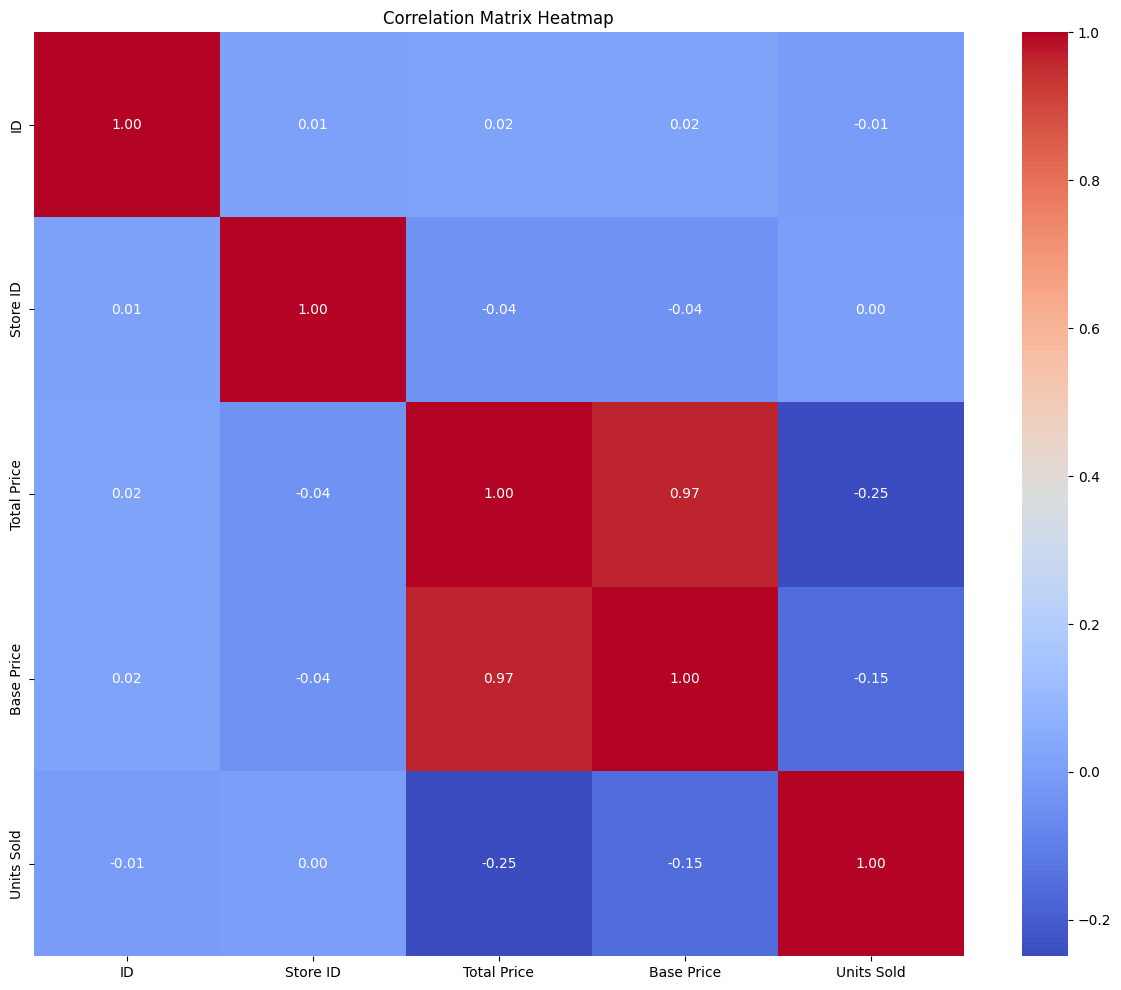

In [ ]:
# prompt: plot heatmap with correlations

correlations = df.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f") #round of f to 2 decimal places
#coolwarm(blue red) color scheme blue for negative cor red for positive cor
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
x = df[["Total Price", "Base Price"]]
y = df["Units Sold"]
print(x.shape,y.shape)

(66672, 2) (66672,)


In [ ]:
# prompt: train the model on basis of decision tree regressor on x and y and fit the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# prompt: find classification report of model

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# prompt: perform mse and r2 on model

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2317.5788974150278
R-squared: 0.44162059613752236


In [ ]:
from collections import Counter

l1=[1,3,5,7,5,3,7,8,3,8,5,3,2,4,5,7,9]

x=set(l1)
print(x)
print(dict(Counter(l1)))


{1, 2, 3, 4, 5, 7, 8, 9}
{1: 1, 3: 4, 5: 4, 7: 3, 8: 2, 2: 1, 4: 1, 9: 1}
{1: 1, 3: 4, 5: 4, 7: 3, 8: 2, 2: 1, 4: 1, 9: 1}


In [ ]:
# prompt: use pandas to merge 2 datasets and calculate total sales for product with valid promotions

# Assuming you have two dataframes: sales_df and promotions_df
# sales_df should have columns: 'product_id', 'sales'
# promotions_df should have columns: 'product_id', 'promotion_valid' (True/False)

# Example DataFrames (replace with your actual data)
import pandas as pd
sales_data = {'product_id': [1, 2, 3, 4, 5],
              'sales': [100, 150, 200, 120, 180]}
sales_df = pd.DataFrame(sales_data)

promotions_data = {'product_id': [1, 3, 5, 6],
                   'promotion_valid': [True, True, False, True]}
promotions_df = pd.DataFrame(promotions_data)
#---------------------------------------------------------------------

# Merge the two datasets based on 'product_id'
merged_df = pd.merge(sales_df, promotions_df, on='product_id', how='left')

# Fill NaN values in 'promotion_valid' with False (assuming no promotion if not specified)
merged_df['promotion_valid'].fillna(False, inplace=True)

# Calculate total sales for products with valid promotions
total_sales_with_valid_promotions = merged_df[merged_df['promotion_valid']]['sales'].sum()

print(f"Total sales for products with valid promotions: {total_sales_with_valid_promotions}")

Total sales for products with valid promotions: 300


<ipython-input-12-303aa69e4c43>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['promotion_valid'].fillna(False, inplace=True)
<ipython-input-12-303aa69e4c43>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['promotion_valid'].fillna(False, inplace=True)


In [ ]:
import pandas as pd
sales_data = {'product_id': [1, 2, 3, 4, 5],
              'sales': [100, 150, 200, 120, 180]}
sales_df = pd.DataFrame(sales_data)

promotions_data = {'product_id': [1, 3, 5, 6],
                   'promotion_valid': [True, True, False, True]}
promotions_df = pd.DataFrame(promotions_data)
mergedata=pd.merge(sales_df,promotions_df,on='product_id',how='outer') #left right inner outer
# print(mergedata)
mergedata['sales'].fillna(0,inplace=True)
mergedata['promotion_valid'].fillna(False,inplace=True)
print(mergedata)

sales_by_promotion = mergedata.groupby('promotion_valid')['sales'].sum()
sales_by_promotion



   product_id  sales  promotion_valid
0           1  100.0             True
1           2  150.0            False
2           3  200.0             True
3           4  120.0            False
4           5  180.0            False
5           6    0.0             True


<ipython-input-26-ccfd380c5cd5>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mergedata['sales'].fillna(0,inplace=True)
<ipython-input-26-ccfd380c5cd5>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,sales
promotion_valid,
False,450.0
True,300.0
